# Simulate Time Between Events from Sample
Using Julia, fit a data sample to a Exponential distribution comprised of a number of trials (draws) of your choosing. The default number of trials is 10,000. In probability theory and statistics, the exponential distribution is the probability distribution of the time between events in a process in which events occur continuously and independently at a constant average rate. 

## 0. Import packages and define SimulateTimeBtwnEventsFromSample function
Install (if necessary) and import the functions necessary to run the SimulateTimeBtwnEventsFromSample function. Then define the function for later use. 

In [12]:
# using Pkg
# Pkg.add("DataFrames")
# Pkg.add("Distributions")
# Pkg.add("Plots")
# Pkg.add("PlotThemes")
# Pkg.add("KernelDensity")

using DataFrames
using Distributions
using Plots
using PlotThemes
using KernelDensity
gr()
theme(:bright)

function SimulateTimeBtwnEventsFromSample(
    dataframe::DataFrame,
    column_name::String,
    trials::Integer=10000,
    show_plot::Bool=true
)
    # Get parameters for simulation
    Param_ExponentialDistSim = fit(Exponential, dataframe[:, column_name])
    println("The mean time between events (θ) used in simulation: ", Param_ExponentialDistSim.θ)
    # Conduct simulation
    Arr_ExponentialDistSim = rand(Param_ExponentialDistSim, trials, 1)
    DF_ExponentialDistSim = DataFrame(Arr_ExponentialDistSim, :auto)
    # Get kernel density estimates for sample and simulation
    kde_sample = kde(dataframe[:, column_name])
    kde_simulation = kde(DF_ExponentialDistSim[:, "x1"])
    # Generate plot if requested by user
    if show_plot
        title_for_plot = "Simulated Time Between Events (Exponential Distribution)"
        p = histogram(
            DF_ExponentialDistSim[:, "x1"], 
            bins= :scott, 
            fillalpha= 0.4, 
            label= "Simulated Time", 
            title= title_for_plot, 
            xlabel= column_name
        )
        plot!(
            kde_simulation.x, 
            kde_simulation.density .* length(DF_ExponentialDistSim[:, "x1"]), 
            linewidth= 3, 
            color= 1, 
            label= "Density of Simulation"
        )
        plot!(
            kde_sample.x, kde_sample.density .* length(DF_ExponentialDistSim[:, "x1"]), 
            alpha= 0.6,
            linewidth= 3, 
            color= 2, 
            label= "Density of Sample"
        )
        display(p)
    end
    # Return simulation results
    return DF_ExponentialDistSim
end

SimulateTimeBtwnEventsFromSample (generic function with 3 methods)

## 1. Import your data sample
First, import your data sample into Julia. This example uses a randomly generated dataset.

In [2]:
Arr_RandomNumbers = rand(0:10, 50, 1)
DF_RandomNumbers = DataFrame(Arr_RandomNumbers, :auto)

,x1
,Int64
1,7
2,9
3,7
4,8
5,5
6,3
7,4
8,5
9,0


## 2. Use the SimulateTimeBtwnEventsFromSample function
Use the SimulateTimeBtwnEventsFromSample function to simulate a Bernoulli distribution from your sample dataset.

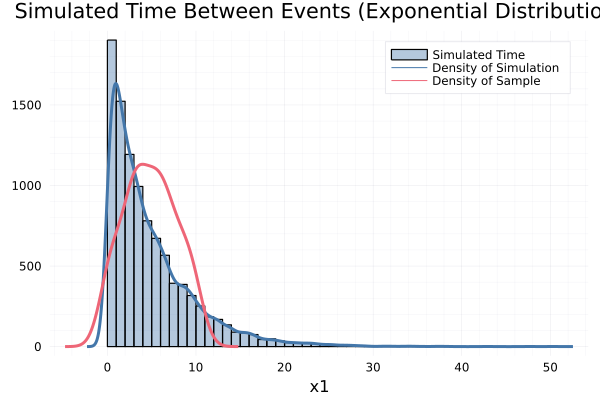

The mean time between events (θ) used in simulation: 4.84


,x1
,Float64
1,0.0201864
2,17.175
3,9.24588
4,4.79853
5,1.45542
6,0.505978
7,3.69224
8,3.39542
9,3.29232


In [13]:
DF_Sim = SimulateTimeBtwnEventsFromSample(DF_RandomNumbers, "x1")